# 利用 PCA 对半导体制造数据降维

说明:

将 `secom.data` 放在当前目录下。

In [1]:
from numpy import *
import numpy as np

## PCA 算法

In [2]:
def pca(dataMat, topNfeat=9999999):
    meanVals = dataMat.mean(0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions    
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

## 数据导入函数

In [3]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

## 导入数据，将 NaN 替换成平均值

In [4]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [5]:
dataMat = replaceNanWithMean()

## 数据预处理，减去均值

In [6]:
meanVals = mean(dataMat, 0)
meanRemoved = dataMat - meanVals

## 协方差与特征值分析

In [7]:
covMat = cov(meanRemoved, rowvar=0)
eigVals, eigVects = linalg.eig(mat(covMat))
print(eigVals); len(eigVals)

[  5.34151979e+07   2.17466719e+07   8.24837662e+06   2.07388086e+06
   1.31540439e+06   4.67693557e+05   2.90863555e+05   2.83668601e+05
   2.37155830e+05   2.08513836e+05   1.96098849e+05   1.86856549e+05
   1.52422354e+05   1.13215032e+05   1.08493848e+05   1.02849533e+05
   1.00166164e+05   8.33473762e+04   8.15850591e+04   7.76560524e+04
   6.66060410e+04   6.52620058e+04   5.96776503e+04   5.16269933e+04
   5.03324580e+04   4.54661746e+04   4.41914029e+04   4.15532551e+04
   3.55294040e+04   3.31436743e+04   2.67385181e+04   1.47123429e+04
   1.44089194e+04   1.09321187e+04   1.04841308e+04   9.48876548e+03
   8.34665462e+03   7.22765535e+03   5.34196392e+03   4.95614671e+03
   4.23060022e+03   4.10673182e+03   3.41199406e+03   3.24193522e+03
   2.74523635e+03   2.35027999e+03   2.16835314e+03   1.86414157e+03
   1.76741826e+03   1.70492093e+03   1.66199683e+03   1.53948465e+03
   1.33096008e+03   1.25591691e+03   1.15509389e+03   1.12410108e+03
   1.03213798e+03   1.00972093e+03

590

## 计算主成分所占方差比

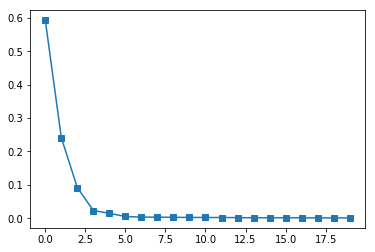

In [8]:
import matplotlib.pyplot as plt

Var = eigVals
Var_sum = sum(Var)
Var_rate = Var/Var_sum
plt.plot(Var_rate[:20],'s-') # plot 20st
plt.show()

## 计算主成分累计方差百分比

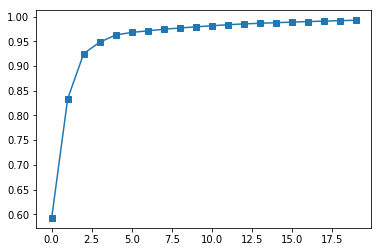

In [9]:
Var = eigVals
Var_sum = sum(Var)
Var_add = zeros_like(Var)
for i in range(len(Var)):
    Var_add[i] = sum(Var[:i+1])/Var_sum
plt.plot(Var_add[:20],'s-') # plot 20st 
plt.show()

## 使用 PCA 降维，保留 6 个最大特征

In [10]:
lowDMat, reconMat = pca(dataMat, 6)

In [11]:
print(lowDMat.shape)

(1567, 6)


In [12]:
print(reconMat.shape)

(1567, 590)
